In [ ]:
simport cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from tensorflow.keras.layers import GlobalAvgPool2D, Dense
from keras.preprocessing import image

In [ ]:
import cv2

def check_image_shape(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load the image.")
        return

    # Get the shape of the image
    height, width, channels = image.shape

    print("Image shape:", height, "x", width, "x", channels)

In [ ]:
def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            if f_path.endswith('jpg'):
                df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

In [ ]:
zip_folder_path = '/content/drive/My Drive/PTXLA/XLA.zip'
file_path = '/content/drive/My Drive/PTXLA/XLA/'
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall(file_path)

KeyboardInterrupt: 

In [ ]:
# constants to be used in creating dataframes
IMG_DIM = 48
CLASSES = sorted(['angry', 'disgust', 'fear','happy','sad','surprise','neutral'])
print(CLASSES)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
folder_path = '/content/drive/My Drive/PTXLA/XLA/XLA'

In [ ]:
# creating dataframes
df = create_dataframe(os.path.join(folder_path, 'train'))
df_test = create_dataframe(os.path.join(folder_path, 'test'))

In [ ]:
train_count = df.shape[0]
test_count = df_test.shape[0]

print(f"Số lượng mẫu trong tập train: {train_count}")
print(f"Số lượng mẫu trong tập test: {test_count}")

Số lượng mẫu trong tập train: 28709
Số lượng mẫu trong tập test: 7178


In [ ]:
# splitting the training dataframe into train and val
df_train, df_val = train_test_split(df, test_size=0.30, random_state=0)

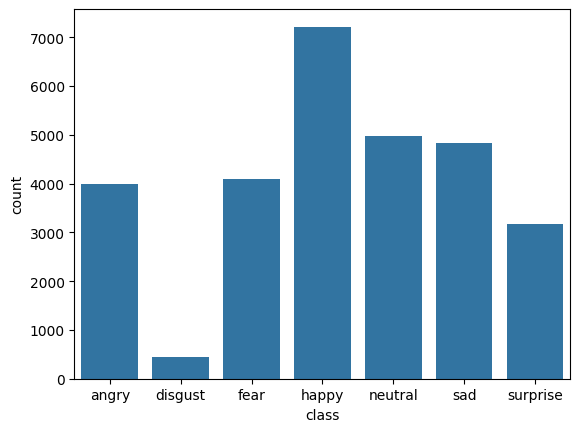

In [ ]:
# plotting the number of images of each class in the data
sns.countplot(x = df["class"])
plt.xticks(rotation = 0);

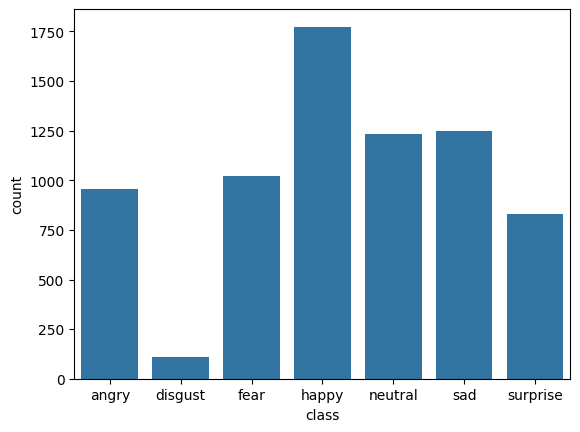

In [ ]:
sns.countplot(x = df_test["class"])
plt.xticks(rotation = 0);

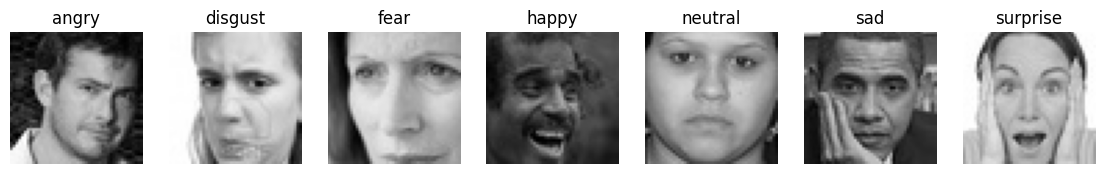

In [ ]:
train_dir = '/content/drive/My Drive/PTXLA/XLA/XLA/train/'
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
#drop any row that have labeled as disgust in each dataframe
df = df.drop(df[df['class'] == 'disgust'].index)
df_train = df_train.drop(df_train[df_train['class'] == 'disgust'].index)
df_val = df_val.drop(df_val[df_val['class'] == 'disgust'].index)
df_test = df_test.drop(df_test[df_test['class'] == 'disgust'].index)

In [ ]:
CLASSES = sorted(['angry', 'fear','happy','sad','surprise','neutral'])

In [ ]:
df_train

,filename,class
18619,/content/drive/My Drive/PTXLA/XLA/XLA/train/ne...,neutral
11117,/content/drive/My Drive/PTXLA/XLA/XLA/train/ha...,happy
23812,/content/drive/My Drive/PTXLA/XLA/XLA/train/sa...,sad
12749,/content/drive/My Drive/PTXLA/XLA/XLA/train/ha...,happy
11312,/content/drive/My Drive/PTXLA/XLA/XLA/train/ha...,happy
...,...,...
13123,/content/drive/My Drive/PTXLA/XLA/XLA/train/ha...,happy
19648,/content/drive/My Drive/PTXLA/XLA/XLA/train/ne...,neutral
9845,/content/drive/My Drive/PTXLA/XLA/XLA/train/ha...,happy
10799,/content/drive/My Drive/PTXLA/XLA/XLA/train/ha...,happy


In [ ]:
df_test

,filename,class
0,/content/drive/My Drive/PTXLA/XLA/XLA/test/ang...,angry
1,/content/drive/My Drive/PTXLA/XLA/XLA/test/ang...,angry
2,/content/drive/My Drive/PTXLA/XLA/XLA/test/ang...,angry
3,/content/drive/My Drive/PTXLA/XLA/XLA/test/ang...,angry
4,/content/drive/My Drive/PTXLA/XLA/XLA/test/ang...,angry
...,...,...
7173,/content/drive/My Drive/PTXLA/XLA/XLA/test/sur...,surprise
7174,/content/drive/My Drive/PTXLA/XLA/XLA/test/sur...,surprise
7175,/content/drive/My Drive/PTXLA/XLA/XLA/test/sur...,surprise
7176,/content/drive/My Drive/PTXLA/XLA/XLA/test/sur...,surprise


In [ ]:
train_gen = ImageDataGenerator().flow_from_dataframe(
    df_train,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    color_mode='grayscale', # convert the image into grayscale
    width_shift_range = 0.1, # width shifting by range 0.1
    height_shift_range = 0.1, # height shifting by range 0.1
    rotation_range=0.1, #rotation by range 0.1
    horizontal_flip = True, # flip horizontally
    rescale = 1./255 # rascaling the image
)

val_gen = ImageDataGenerator().flow_from_dataframe(
    df_val,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    color_mode='grayscale',
    rescale = 1./255,
    shuffle=False, # turning off the shuffling
)

test_gen = ImageDataGenerator().flow_from_dataframe(
    df_test,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    color_mode='grayscale',
    rescale = 1./255,
    shuffle=False,
)

Found 19792 validated image filenames belonging to 6 classes.
Found 8481 validated image filenames belonging to 6 classes.
Found 7067 validated image filenames belonging to 6 classes.


In [ ]:
train_gen.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

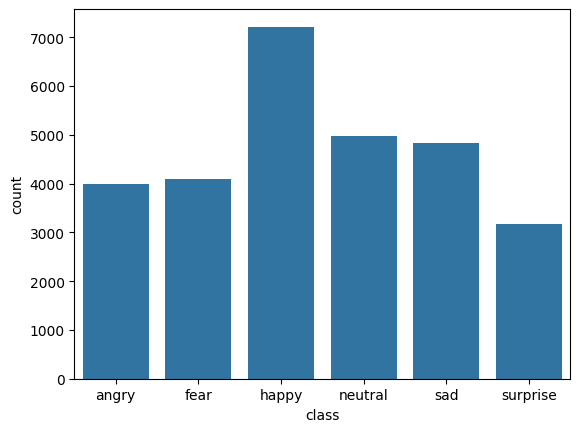

In [ ]:
# plotting the number of images of each class in the data
sns.countplot(x = df["class"])
plt.xticks(rotation = 0);

In [ ]:
img = train_gen[0][0][1]
img.shape

(48, 48, 1)

In [ ]:
# Initialize the CNN model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3),padding='same', input_shape=(IMG_DIM, IMG_DIM, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),padding='same', activation='relu',name='last_conv'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten the output before feeding into the fully connected layers
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Output layer with 6 units for 6 classes and softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ last_conv (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,110 (1.06 MB)

 Trainable params: 278,534 (1.06 MB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
#training session

from tensorflow.keras.callbacks import ModelCheckpoint
# make a check point that saves the best epoch
checkpoint_path = '/content/drive/My Drive/PTXLA/XLA/my_cnn_model.weights.h5'
checkpoint = ModelCheckpoint(checkpoint_path,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1,
                            mode='min')
# train the model in 20 epochs
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint],
    shuffle=True
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3257 - loss: 1.7381
Epoch 1: val_loss improved from inf to 1.35910, saving model to /content/drive/My Drive/PTXLA/XLA/my_cnn_model.weights.h5
619/619 ━━━━━━━━━━━━━━━━━━━━ 148s 173ms/step - accuracy: 0.3258 - loss: 1.7378 - val_accuracy: 0.4599 - val_loss: 1.3591
Epoch 2/20
612/619 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5170 - loss: 1.2530
Epoch 2: val_loss improved from 1.35910 to 1.26555, saving model to /content/drive/My Drive/PTXLA/XLA/my_cnn_model.weights.h5
619/619 ━━━━━━━━━━━━━━━━━━━━ 89s 143ms/step - accuracy: 0.5170 - loss: 1.2529 - val_accuracy: 0.5090 - val_loss: 1.2655
Epoch 3/20
612/619 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5847 - loss: 1.0795
Epoch 3: val_loss improved from 1.26555 to 1.19201, saving model to /content/drive/My Drive/PTXLA/XLA/my_cnn_model.weights.h5
619/619 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.5846 - loss: 1.0797 - val_accuracy: 0.5506 - val_loss: 1.1920
Epoch 4/20
6

In [ ]:
# Save the model in HDF5 format
model.save('/content/drive/My Drive/PTXLA/XLA/my_model.keras')

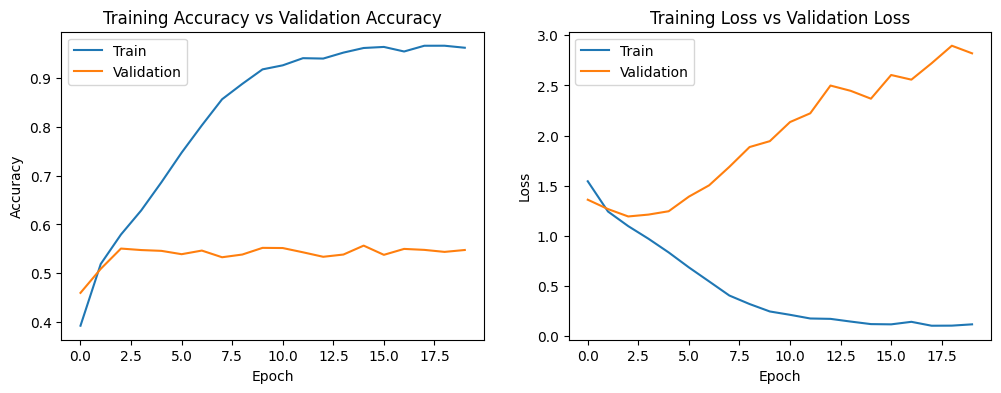

In [ ]:
# plot the graphs that shows the progress of the training of each epoch and compare the training accuracy with the validation accuracy

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# evaluate the model on the testing images
print(checkpoint_path)
model.load_weights(checkpoint_path)
model.evaluate(train_gen)

/content/drive/My Drive/PTXLA/XLA/my_cnn_model.weights.h5
619/619 ━━━━━━━━━━━━━━━━━━━━ 66s 107ms/step - accuracy: 0.6585 - loss: 0.9133


[0.9149859547615051, 0.6552647352218628]

In [ ]:
# evaluate the model on the testing images
print(checkpoint_path)
model.load_weights(checkpoint_path)
model.evaluate(test_gen)

/content/drive/My Drive/PTXLA/XLA/my_cnn_model.weights.h5
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.4962 - loss: 1.2642


[1.188363790512085, 0.5469081401824951]

Number of images found: 7178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


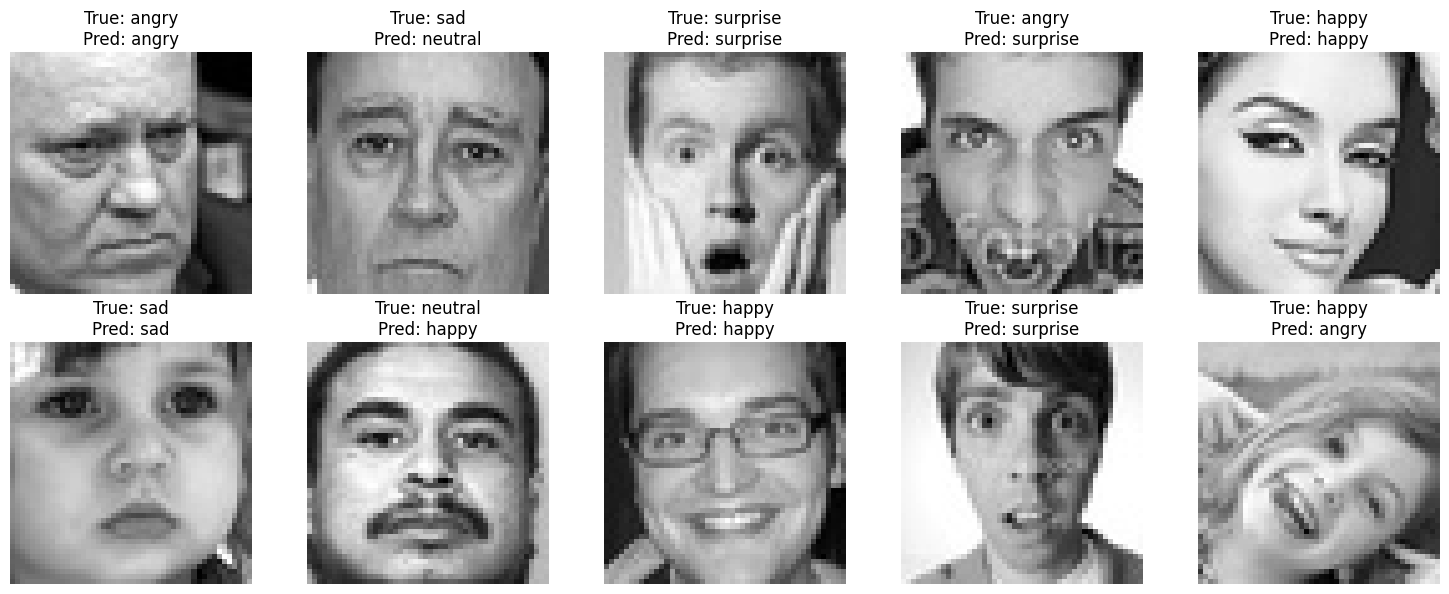

In [ ]:
import random
test_folder_path = '/content/drive/My Drive/PTXLA/XLA/XLA/test/'

image_files = []
true_labels = []
for root, dirs, files in os.walk(test_folder_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))
            true_label = os.path.basename(root)
            true_labels.append(true_label)

num_images = len(image_files)
print(f"Number of images found: {num_images}")

num_to_sample = min(num_images, 10)

random_indices = random.sample(range(num_images), num_to_sample)
random_images = [image_files[i] for i in random_indices]
random_true_labels = [true_labels[i] for i in random_indices]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Predict for each selected image and display them
for ax, img_file, true_label in zip(axes.flatten(), random_images, random_true_labels):
    # Read the image
    image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

    # Resize the image
    image = cv2.resize(image, (48, 48), interpolation=cv2.INTER_LINEAR)

    # Prepare the image for prediction
    img = np.array(image)
    img = img.reshape(1, 48, 48, 1)

    # Make prediction
    predict_x = model.predict(img)
    result = np.argmax(predict_x)

    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f"True: {true_label}\nPred: {CLASSES[result]}")
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

221/221 ━━━━━━━━━━━━━━━━━━━━ 28s 122ms/step
Confusion Matrix
[[ 454   71  118  117  168   30]
 [ 147  230  120  118  270  139]
 [  96   35 1454   71   82   36]
 [ 140   65  173  579  246   30]
 [ 201  116  148  199  561   22]
 [  32   62   78   48   24  587]]
Classification Report
              precision    recall  f1-score   support

       angry       0.42      0.47      0.45       958
        fear       0.40      0.22      0.29      1024
       happy       0.70      0.82      0.75      1774
     neutral       0.51      0.47      0.49      1233
         sad       0.42      0.45      0.43      1247
    surprise       0.70      0.71      0.70       831

    accuracy                           0.55      7067
   macro avg       0.52      0.52      0.52      7067
weighted avg       0.53      0.55      0.54      7067



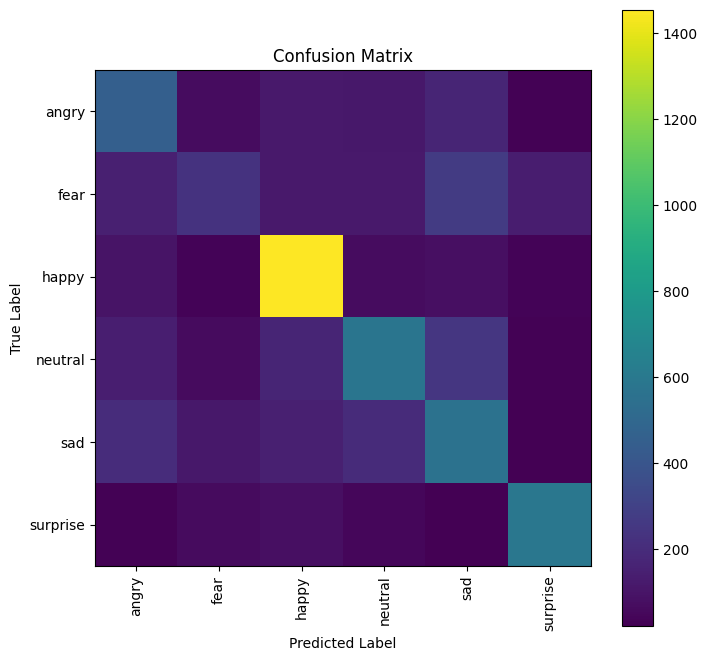

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Dự đoán trên tập kiểm tra
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}

cm_test = confusion_matrix(test_gen.classes, y_pred)
print('Confusion Matrix')
print(cm_test)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8, 8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 22.6 MB/s eta 0:00:00


## Facial Reg on Video

In [ ]:
!wget https://path-to-model/yolov8n-face.pt

--2025-01-16 20:36:22--  https://path-to-model/yolov8n-face.pt
Resolving path-to-model (path-to-model)... failed: Name or service not known.
wget: unable to resolve host address ‘path-to-model’


In [ ]:
model_path = 'yolov8n-face.pt'
if not os.path.exists(model_path):
    !wget https://path-to-model/yolov8n-face.pt

--2025-01-16 20:37:29--  https://path-to-model/yolov8n-face.pt
Resolving path-to-model (path-to-model)... failed: Name or service not known.
wget: unable to resolve host address ‘path-to-model’


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

model = load_model('/content/drive/My Drive/PTXLA/XLA/my_model.keras')

# Define the emotion classes
CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to process video and detect emotions
def detect_emotions_in_video(video_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

        # Process each detected face
        for (x, y, w, h) in faces:
            # Draw a rectangle around the face
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Extract the face region for emotion detection
            face_roi = gray_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_roi, (48, 48))
            img_array = np.array(resized_face)
            img_array = img_array.reshape(1, 48, 48, 1).astype('float32') / 255.0  # Normalize the image

            # Make prediction
            predictions = model.predict(img_array)
            emotion_index = np.argmax(predictions)
            emotion_label = CLASSES[emotion_index]

            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

        out.write(frame)
    cap.release()
    out.release()

video_path = '/content/drive/My Drive/PTXLA/XLA/J97.mp4'
output_path = '/content/drive/My Drive/PTXLA/XLA/result_video.mp4'

detect_emotions_in_video(video_path, output_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━